# Stock Price Prediction Model

In [10]:
#Import the libraries

import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics,datasets
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from numpy.linalg import inv, pinv, LinAlgError
from sklearn.metrics import mean_squared_error, r2_score


In [11]:
#read Datasets and Split into train and test

df = pd.read_csv("Train Data.csv")
df = df.dropna(how='any',axis=0)

data = df.to_numpy()
print("shape of data : ",data.shape)
print("Number of rows :",data.shape[0])
print("Number of columns :",data.shape[1])

shape of data :  (3445, 5)
Number of rows : 3445
Number of columns : 5


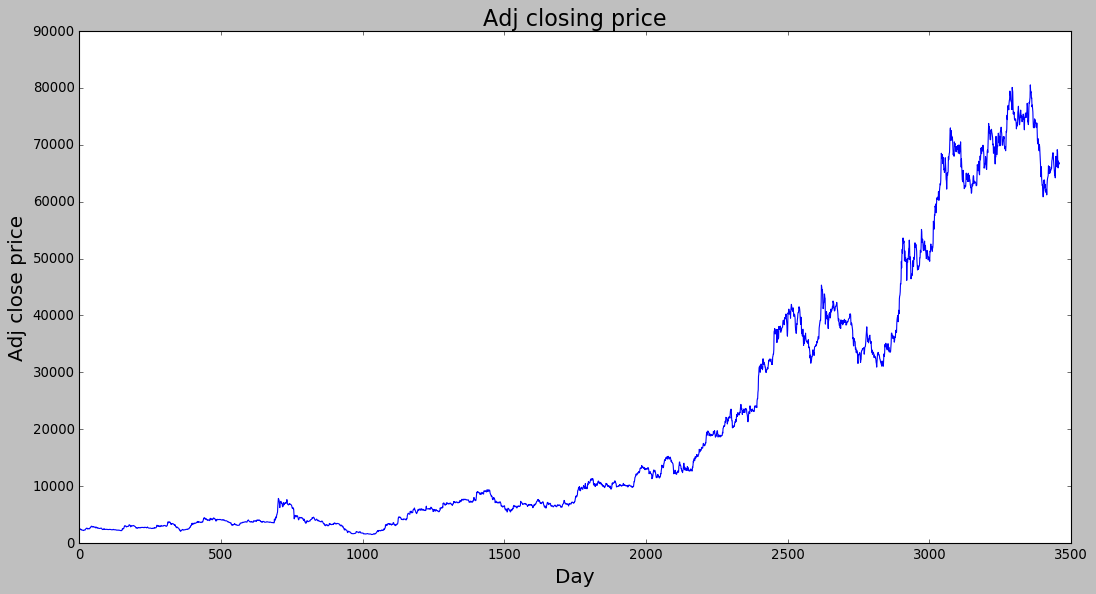

In [12]:
#Day wise closing price

plt.style.use('classic')
plt.figure(figsize=(16,8))
plt.title('Adj closing price',fontsize=20)
plt.plot(df['Adj Close'])
plt.xlabel('Day',fontsize=18)
plt.ylabel('Adj close price',fontsize=18)
plt.show()

In [13]:
#Train Model
#First 4 is independent variables taking as a X and last variable is dependent tak as Y

x_train = np.zeros((3300,data.shape[1]))
x_train[:,0]=np.ones((3300,))
x_train[:,1:] = data[0:3300,0:4]
y_train = data[0:3300,4]

print("x_train ==> \n",x_train)
print("y_train ==> \n",y_train)

print("shape of x train : ",x_train.shape)
print("shape of y train : ",y_train.shape)

x_train ==> 
 [[1.00000000e+00 2.45000000e+03 2.54255005e+03 2.43100000e+03
  5.57200000e+03]
 [1.00000000e+00 2.57500000e+03 2.59800000e+03 2.53030005e+03
  3.62000000e+03]
 [1.00000000e+00 2.54000000e+03 2.59900000e+03 2.42255005e+03
  8.34700000e+03]
 ...
 [1.00000000e+00 7.37500000e+04 7.45550000e+04 7.36520000e+04
  4.54000000e+03]
 [1.00000000e+00 7.41000000e+04 7.64975000e+04 7.41000000e+04
  5.92600000e+03]
 [1.00000000e+00 7.60010000e+04 7.74290000e+04 7.52500000e+04
  5.28600000e+03]]
y_train ==> 
 [ 2398.945068  2406.021484  2431.730957 ... 73560.90625  75747.83594
 76076.28125 ]
shape of x train :  (3300, 5)
shape of y train :  (3300,)


In [14]:
#Test Model

x_test = np.zeros((145,data.shape[1]))
print("shape of x train : ",x_test.shape)
x_test[:,0]=np.ones((145,))
x_test[:,1:] = data[3300:3445,0:4]
y_test = data[3300:3445,4]

print("x_test ==> \n",x_test)
print("y_test ==> \n",y_test)

print("shape of x test : ",x_test.shape)
print("shape of y test : ",y_test.shape)

shape of x train :  (145, 5)
x_test ==> 
 [[1.00000000e+00 7.63210000e+04 7.74230000e+04 7.54553984e+04
  4.95800000e+03]
 [1.00000000e+00 7.71900000e+04 7.76880000e+04 7.53390000e+04
  4.23200000e+03]
 [1.00000000e+00 7.58110000e+04 7.67748984e+04 7.44001016e+04
  4.37500000e+03]
 [1.00000000e+00 7.54000000e+04 7.54900000e+04 7.41110000e+04
  3.39100000e+03]
 [1.00000000e+00 7.47000000e+04 7.50000000e+04 7.31050000e+04
  5.76100000e+03]
 [1.00000000e+00 7.40640000e+04 7.46910000e+04 7.34102031e+04
  4.00400000e+03]
 [1.00000000e+00 7.44500000e+04 7.58800000e+04 7.44500000e+04
  4.55500000e+03]
 [1.00000000e+00 7.53998984e+04 7.65030000e+04 7.45000000e+04
  4.14300000e+03]
 [1.00000000e+00 7.62490000e+04 7.67515000e+04 7.59002031e+04
  3.01500000e+03]
 [1.00000000e+00 7.68600000e+04 7.68600000e+04 7.53530000e+04
  3.00000000e+03]
 [1.00000000e+00 7.59000000e+04 7.62325000e+04 7.49520000e+04
  2.47600000e+03]
 [1.00000000e+00 7.50770000e+04 7.56650000e+04 7.47840000e+04
  3.51800000e+03


## Apply Scalling

In [15]:
scaler = StandardScaler()
scaler.fit(x_train[:,1:])
x_train[:,1:]=scaler.transform(x_train[:,1:])
x_test[:,1:]=scaler.transform(x_test[:,1:])

print(x_train)
print(y_train)

[[ 1.         -0.79588079 -0.79487657 -0.79333181 -0.32870199]
 [ 1.         -0.78984315 -0.79222802 -0.78848139 -0.49958704]
 [ 1.         -0.79153369 -0.79218026 -0.79374456 -0.08576858]
 ...
 [ 1.          2.64798794  2.64478138  2.68553326 -0.41904695]
 [ 1.          2.66489333  2.73756444  2.70741629 -0.29771157]
 [ 1.          2.75671372  2.78205732  2.76358926 -0.35373945]]
[ 2398.945068  2406.021484  2431.730957 ... 73560.90625  75747.83594
 76076.28125 ]


In [16]:
lam=10
n = x_train.shape[1]
a = np.zeros((n, n), int)
np.fill_diagonal(a, lam)
a[0][0] = 0
print(a.shape)
print(a)

(5, 5)
[[ 0  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0 10  0]
 [ 0  0  0  0 10]]


## Normal equation method

In [17]:
print("using normal equation method.....")
theta = np.zeros(x_train.shape[1])

a1 =np.dot(x_train.T,x_train)
print(a1.shape)
a2 = a1 + a
XtXi = inv(a2)

Xty = np.dot(x_train.T,y_train)

theta = np.dot(XtXi,Xty)
print("theta : ",theta)
print("theta shape" , theta.shape)

using normal equation method.....
(5, 5)
theta :  [18724.92116239  6118.75792577  7322.19524747  7161.08363857
    50.40745432]
theta shape (5,)


In [18]:
print("predict for test datasets....")
prediction = np.dot(x_test,theta)
print(prediction.shape)
print(prediction)
r2 = r2_score(y_test,prediction)
print("Mean Absolute Error : ",metrics.mean_absolute_error(y_true=y_test,y_pred=prediction))
print("Mean Squarred Error : ",metrics.mean_squared_error(y_true=y_test,y_pred=prediction))
print("r2 score : ",r2)

predict for test datasets....
(145,)
[75898.68900798 76204.27873268 75149.5875138  74473.26797835
 73753.58299792 73556.55106978 74452.61770994 74966.9146233
 75789.57191522 75816.6228937  75170.85973076 74674.98225857
 74955.46296165 74795.6964021  74095.83030018 74377.35010577
 74515.13156297 74741.82962923 75201.24691115 74551.64455162
 74341.74767045 73444.65003611 73550.52177722 74729.00111122
 74841.83745904 75128.97903064 75385.0735016  74965.9733784
 74991.65415587 75248.52750656 75515.14302333 76583.71438121
 76863.43972257 75532.91368029 74282.07015524 74278.95927262
 73922.11779661 74916.24980504 76390.19748138 77218.00635326
 77233.82698693 78055.615529   79074.28898895 79919.2634056
 79699.6054536  79331.73120771 78509.39155883 78199.81504834
 77433.68891008 76553.84650063 76494.60320219 76216.49999465
 74972.62380112 73572.94922846 73287.12142774 73226.88695438
 72946.93004753 73757.53898345 74390.85695147 73968.45041696
 73943.5141255  73757.9135468  73643.23843268 72986

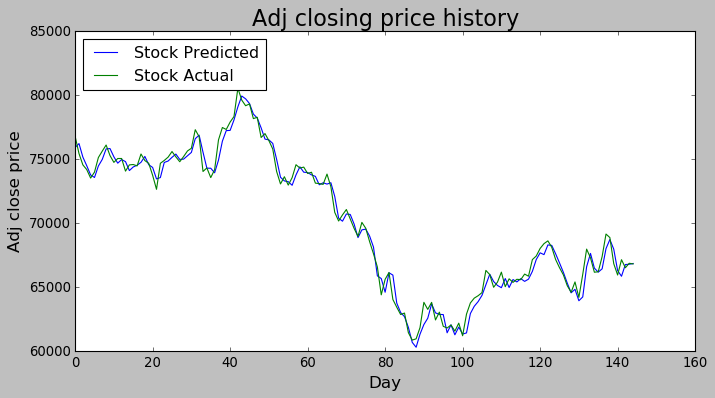

In [19]:
# Let's visualize the Adj closing price
plt.style.use('classic')
plt.figure(figsize=(10,5))
plt.title('Adj closing price history',fontsize=20)
plt.plot(prediction,label="Stock Predicted")
plt.plot(y_test,label="Stock Actual")
plt.legend(loc=2)
plt.xlabel('Day',fontsize=15)
plt.ylabel('Adj close price',fontsize=15)
plt.show()

## Gradient descent method 

In [21]:
theta = np.random.uniform(0,1,size=x_train.shape[1]) 
itr = 1000
alpha = 0.01
lam = 10
m = x_train.shape[0]
n = x_train.shape[1]
costvalue =[]
for i in  range(itr):
    update=np.zeros(x_train.shape[1])
    ypred = np.dot(x_train,theta)
    err = ypred - y_train
    for j in range(n):
        update[j]=np.sum(np.dot(err,x_train[:,j]))
    theta[0] = theta[0] - (1/m)*(alpha)*(update[0])
    theta[1:] = theta[1:]*(1-((alpha*lam)/m)) - (1/m)*(alpha)*(update[1:])
    costvalue.append((1/(2*m))*(np.sum(err**2) + (lam)*np.sum(np.dot(theta,theta))))

print(theta)

[18724.11279587  6845.61978081  6876.17033454  6879.77394136
    53.08671153]


### Prediction of test datasets 

In [27]:
prediction = np.dot(x_test,theta)
print(y_test)
print(prediction)
print(prediction.shape)
r2 = r2_score(y_test,prediction)
print("MAE : ",metrics.mean_absolute_error(y_true=y_test,y_pred=prediction))
print("MSE : ",metrics.mean_squared_error(y_true=y_test,y_pred=prediction))
print("r2 score : ",r2)

[76768.78906 75420.78906 74539.35156 74172.57031 73510.33594 73975.28906
 75115.57031 75614.99219 76091.60938 75268.125   74737.63281 75037.97656
 75039.46875 74052.27344 74540.24219 74567.9375  74462.38281 75390.32031
 74875.75    74662.73438 73731.30469 72631.36719 74664.42188 74886.80469
 75147.125   75583.10938 75165.24219 74786.53906 75192.73438 75629.82031
 75838.85938 77290.22656 76741.10156 74024.58594 74300.44531 73546.97656
 74167.28906 76494.83594 77460.80469 77306.85938 77885.35938 78319.55469
 80526.09375 79600.83594 79161.64844 79303.65625 78154.96875 78258.78125
 76678.39063 76985.42969 76436.85938 75783.67969 74027.49219 73050.20313
 73614.42969 72961.16406 73542.63281 74553.92188 74291.74219 74366.03906
 73869.82813 73965.55469 73112.92969 73082.51563 73015.10938 73820.85156
 72835.71094 70831.29688 70156.57031 70633.44531 71053.78125 70310.34375
 69575.40625 68951.03906 70048.875   69588.16406 68540.1875  67594.82813
 66558.71094 64388.37109 65597.59375 66134.00781 64

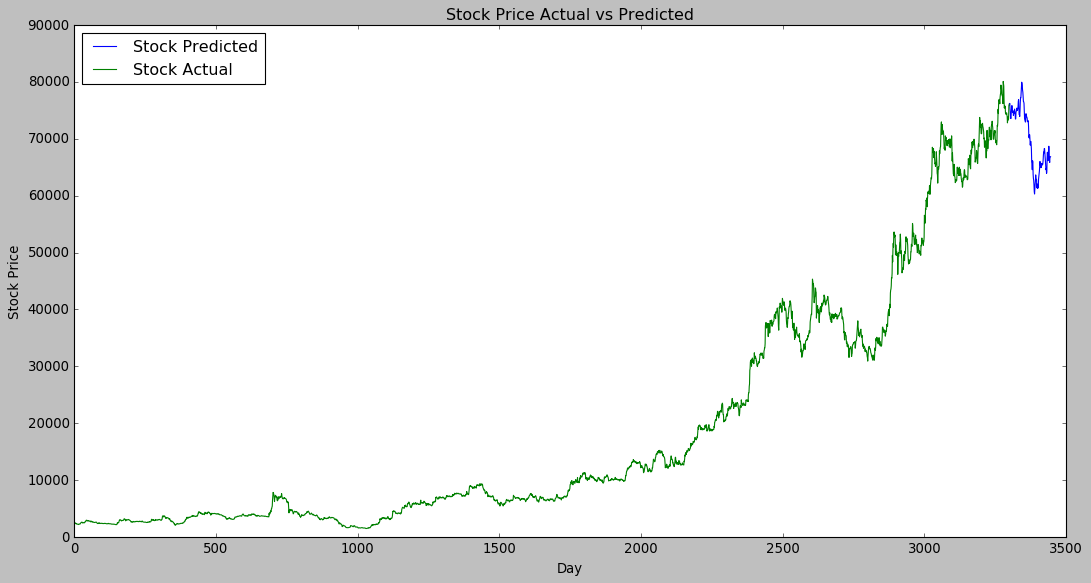

In [23]:
plt.figure(figsize=(16,8))
w1 = np.linspace(3300,3445,145)
plt.plot(w1, prediction,label="Stock Predicted")
plt.plot(y_train,label="Stock Actual")
plt.legend(loc=2)
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.title('Stock Price Actual vs Predicted')
plt.show()


In [25]:
print("Data Testing Value ===> ",data[3301][4])
print("Model Predicted value ===> ",prediction[1])

Data Testing Value ===>  75420.78906
Model Predicted value ===>  76222.73704974786


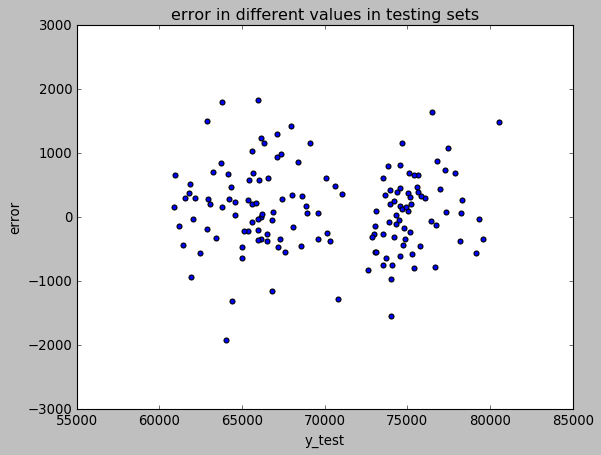

In [26]:
err = y_test - prediction
plt.scatter(y_test,err)
plt.xlabel('y_test')
plt.ylabel('error')
plt.title('error in different values in testing sets')
plt.show()